# Facebook's Prophet Library

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

### 1. Reading the Dataset

In [2]:
df = pd.read_csv('../UPDATE-TSA-NOTEBOOKS/Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
date    324 non-null object
beer    324 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [7]:
def df_to_markdown(*dfs, sep_line='\n---\n', **kwargs):
    """Convert pandas dataframe to markdown table."""
    import tabulate

    disable_numparse = kwargs.pop('disable_numparse', True)
    tablefmt = kwargs.pop('tablefmt', 'pipe')
    headers = kwargs.pop('headers', 'keys')
    
    for df in dfs:
        print(tabulate.tabulate(df, tablefmt=tablefmt, headers=headers,
                                disable_numparse=disable_numparse, **kwargs))
        if sep_line is not None:
            print(sep_line)

In [9]:
df_to_markdown(df.head())

|    | date     | beer   |
|:---|:---------|:-------|
| 0  | 1/1/1992 | 1509   |
| 1  | 2/1/1992 | 1541   |
| 2  | 3/1/1992 | 1597   |
| 3  | 4/1/1992 | 1675   |
| 4  | 5/1/1992 | 1822   |

---



In [14]:
# Change the names
df.columns = ['ds','y']
# Make sure ds column is a pandas datetime object
df['ds'] = pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [16]:
df_to_markdown(df.head())

|    | ds                  | y    |
|:---|:--------------------|:-----|
| 0  | 1992-01-01 00:00:00 | 1509 |
| 1  | 1992-02-01 00:00:00 | 1541 |
| 2  | 1992-03-01 00:00:00 | 1597 |
| 3  | 1992-04-01 00:00:00 | 1675 |
| 4  | 1992-05-01 00:00:00 | 1822 |

---



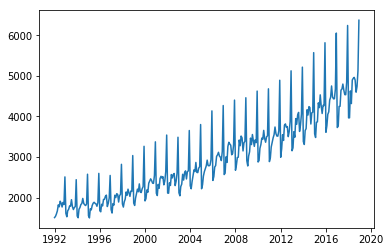

In [40]:
plt.plot(df['ds'],df['y']);

### 2. Prophet Model

In [17]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

/home/eduardo/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 3. Forecast

In [25]:
# In Stead of doing df.index.freq = 'MS' 
future = m.make_future_dataframe(periods=24,freq='MS')
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [26]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [27]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [28]:
len(df)

324

In [29]:
len(future)

348

In [30]:
# In Stead of doing df.index.freq = 'MS' 
forecast = m.predict(future)

In [31]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1146.875480,1478.822381,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1194.214390,1507.301097,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1427.603028,1756.561139,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1410.473763,1741.580252,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1659.163739,1981.480423,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [35]:
# yhat, yhat_lower and yhat_upper are probably the most important terms of this DF
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4461.036182,4794.788463,4629.426372
337,2020-02-01,4512.379490,4838.844984,4680.226146
338,2020-03-01,4780.078537,5102.514914,4943.299086
339,2020-04-01,4767.534246,5106.695339,4941.866893
340,2020-05-01,5025.869377,5356.573693,5198.382732
341,2020-06-01,5025.194272,5341.964427,5178.976562
342,2020-07-01,5140.678415,5473.734284,5311.178497
343,2020-08-01,5066.252602,5397.820186,5240.705951
344,2020-09-01,4933.616900,5252.068863,5083.568322
345,2020-10-01,5026.481965,5336.090900,5189.273100


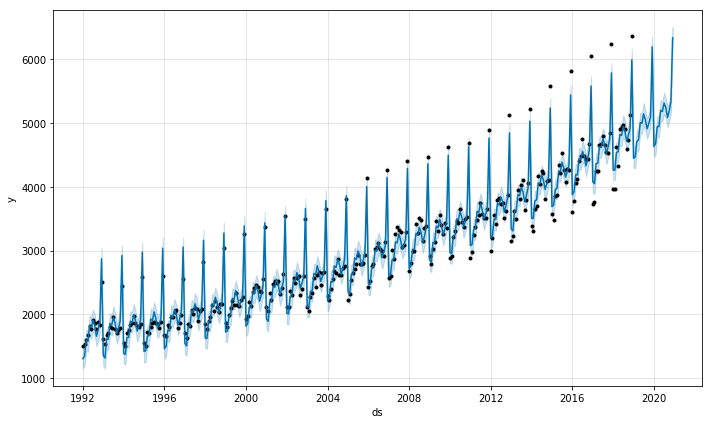

In [41]:
m.plot(forecast);
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output.png');

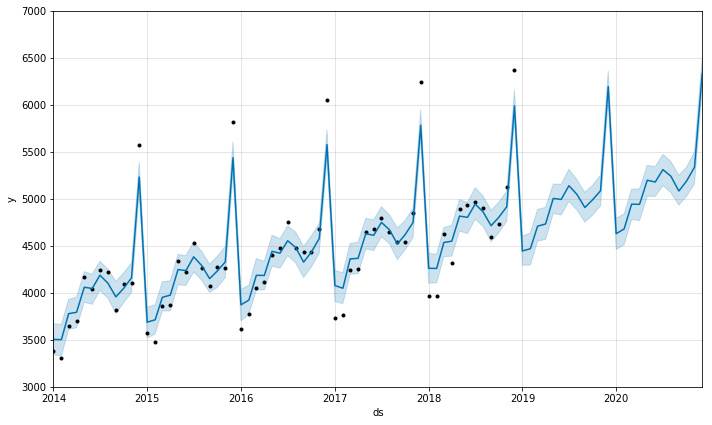

In [43]:
m.plot(forecast)
plt.xlim('2014-01-01','2020-12-01')
plt.ylim(3000,7000);

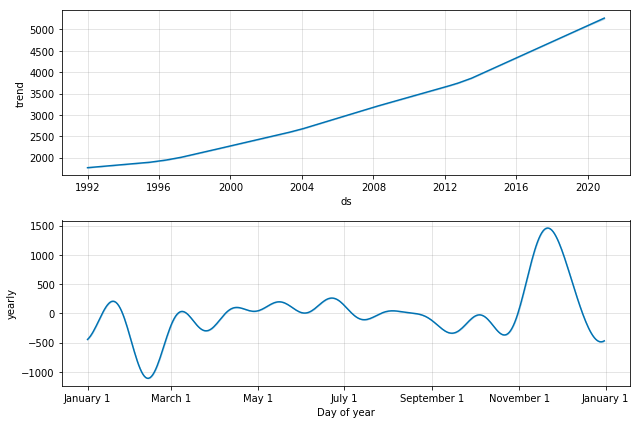

In [45]:
m.plot_components(forecast)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/prophet_output2.png');